In [1]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


In [2]:
#read file
url = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(url)
df.head()

/Users/ajeeshsunny/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
#column names,data types
df.columns
df.dtypes
A = df.describe(include = "all")

A


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1780512,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [6]:
#finding percentage of null values
df.isnull().mean()*100
#drop  the columns have less than 20%
df_new = df[df.columns[df.isnull().mean() < 0.2]].dropna()
df_new.isnull().mean()*100


SEVERITYCODE      0.0
X                 0.0
Y                 0.0
OBJECTID          0.0
INCKEY            0.0
COLDETKEY         0.0
REPORTNO          0.0
STATUS            0.0
ADDRTYPE          0.0
LOCATION          0.0
SEVERITYCODE.1    0.0
SEVERITYDESC      0.0
COLLISIONTYPE     0.0
PERSONCOUNT       0.0
PEDCOUNT          0.0
PEDCYLCOUNT       0.0
VEHCOUNT          0.0
INCDATE           0.0
INCDTTM           0.0
JUNCTIONTYPE      0.0
SDOT_COLCODE      0.0
SDOT_COLDESC      0.0
UNDERINFL         0.0
WEATHER           0.0
ROADCOND          0.0
LIGHTCOND         0.0
ST_COLCODE        0.0
ST_COLDESC        0.0
SEGLANEKEY        0.0
CROSSWALKKEY      0.0
HITPARKEDCAR      0.0
dtype: float64

In [7]:
#finding value counts of each columns along with their percentage 
(df_new.SEVERITYCODE.value_counts() / len(df_new))*100
(df_new['STATUS'].value_counts() / len(df_new))*100
Location = df_new['LOCATION'].value_counts()
(df_new['ADDRTYPE'].value_counts() / len(df_new))*100
(df_new['SEVERITYDESC'].value_counts() / len(df_new))*100
(df_new['COLLISIONTYPE'].value_counts() / len(df_new))*100
(df_new['PERSONCOUNT'].value_counts() / len(df_new))*100
(df_new['PEDCOUNT'].value_counts() / len(df_new))*100
(df_new['PEDCYLCOUNT'].value_counts() / len(df_new))*100
(df_new['VEHCOUNT'].value_counts() / len(df_new))*100
(df_new['JUNCTIONTYPE'].value_counts() / len(df_new))*100
(df_new['SDOT_COLDESC'].value_counts() / len(df_new))*100
(df_new['UNDERINFL'].value_counts() / len(df_new))*100
(df_new['WEATHER'].value_counts() / len(df_new))*100
(df_new['ROADCOND'].value_counts() / len(df_new))*100
(df_new['LIGHTCOND'].value_counts() / len(df_new))*100
(df_new['ST_COLDESC'].value_counts() / len(df_new))*100
(df_new['HITPARKEDCAR'].value_counts() / len(df_new))*100



N    96.845063
Y     3.154937
Name: HITPARKEDCAR, dtype: float64

In [8]:
##dropping the non relevant columns

cols_to_drop = ['STATUS', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'SEVERITYCODE.1',
                    'SEVERITYDESC', 'SEGLANEKEY', 'CROSSWALKKEY']
df_v1 = df_new[df_new.columns.drop(cols_to_drop)]
df_v1.dtypes


SEVERITYCODE      int64
ADDRTYPE         object
LOCATION         object
COLLISIONTYPE    object
PERSONCOUNT       int64
PEDCOUNT          int64
PEDCYLCOUNT       int64
VEHCOUNT          int64
INCDATE          object
INCDTTM          object
JUNCTIONTYPE     object
SDOT_COLCODE      int64
SDOT_COLDESC     object
UNDERINFL        object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
ST_COLCODE       object
ST_COLDESC       object
HITPARKEDCAR     object
dtype: object

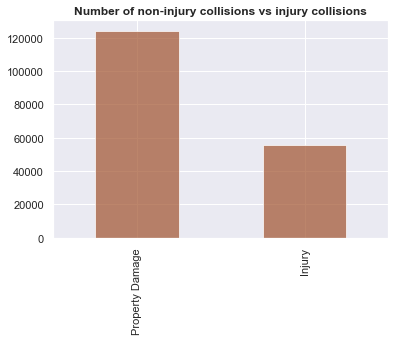

In [35]:
#data visulalization

#severity code
df_new['SEVERITYCODE'].replace({1: 'Property Damage', 2: 'Injury'}, inplace = True)
c=df_new.SEVERITYCODE.value_counts()
df_new['SEVERITYCODE'].value_counts()
c.plot(kind='bar',alpha=0.70,color='sienna')
plt.title('Number of non-injury collisions vs injury collisions',fontweight='bold')

plt.show()


Text(0.5, 1.0, 'Severity vs Under the influence of Alcohol')

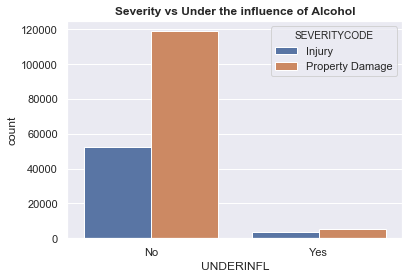

In [37]:
#severity code vs under the influence
df_new['UNDERINFL'].replace({'N': 'No', 'Y': 'Yes', '0': 'No', '1': 'Yes'}, inplace = True)
#df_new['UNDERINFL'].astype(int)
df_new.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts()
sns.countplot(x="UNDERINFL", hue="SEVERITYCODE", data=df_new)
plt.title('Severity vs Under the influence of Alcohol',fontweight='bold')

Text(0.5, 1.0, 'Accident Severity vs Light Conditions')

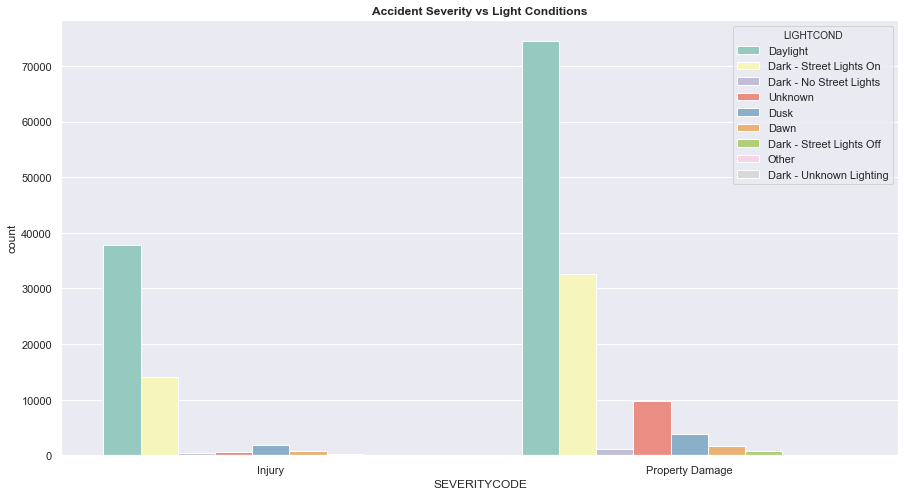

In [39]:
#severity code vs LIGHTCOND
plt.figure(figsize=(15,8))
sns.countplot(x="SEVERITYCODE", hue="LIGHTCOND", data=df_new, palette="Set3")
plt.title('Accident Severity vs Light Conditions', fontweight='bold')


Text(0.5, 1.0, 'Accident Severity vs COLLISION TYPE')

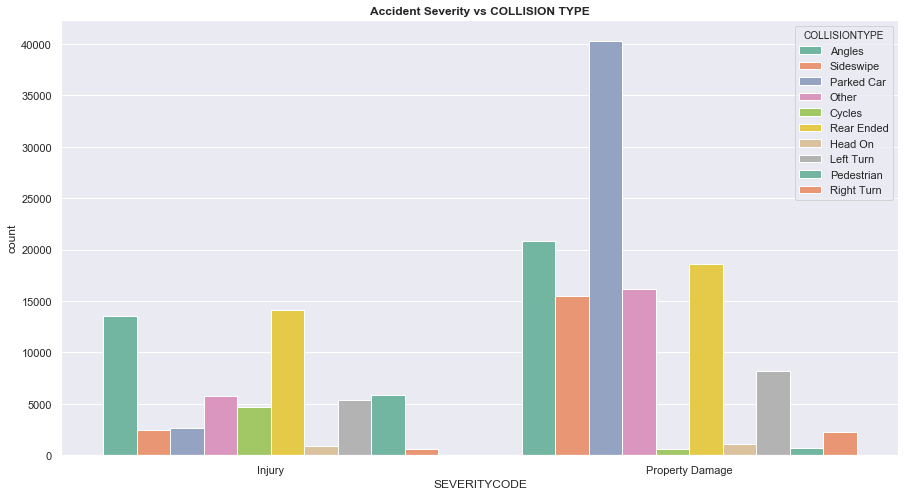

In [40]:

#severity code vs COLLISIONTYPE
plt.figure(figsize=(15,8))
sns.countplot(x="SEVERITYCODE", hue="COLLISIONTYPE", data=df_new,palette="Set2")
plt.title('Accident Severity vs COLLISION TYPE', fontweight='bold')


Text(0.5, 1.0, 'Accident Severity vs Road Condition')

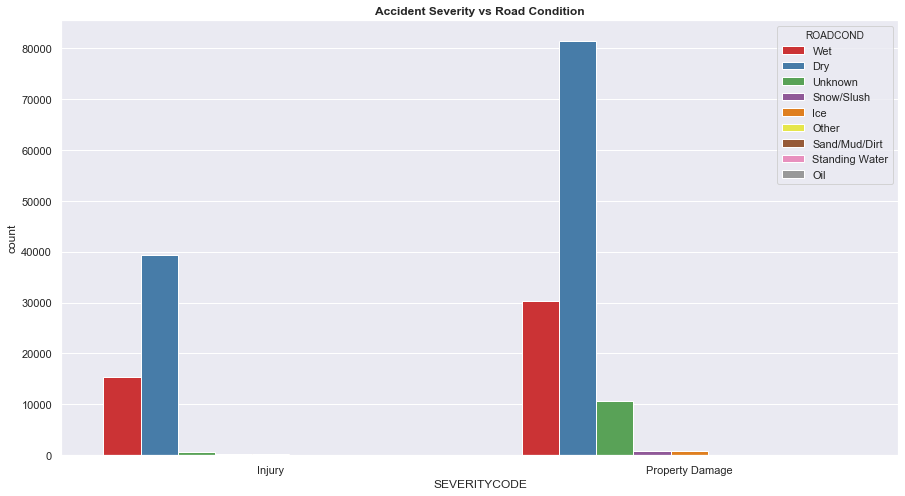

In [41]:
#severity code vs ROADCOND
plt.figure(figsize=(15,8))
sns.countplot(x="SEVERITYCODE", hue="ROADCOND", data=df_new,palette="Set1")
plt.title('Accident Severity vs Road Condition', fontweight='bold')



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

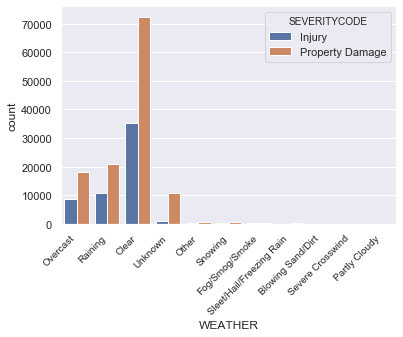

In [42]:
#severity code vs WEATHER
df_new.groupby(['WEATHER'])['SEVERITYCODE'].value_counts()
sns.countplot(x="WEATHER", hue="SEVERITYCODE", data=df_new)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)



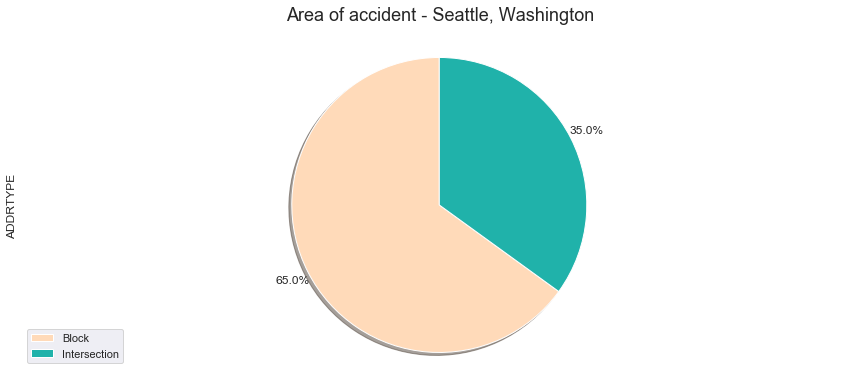

In [43]:
#Area type of each accident
explode_list = [0.05, 0.05, 0.2]
color_list=['peachpuff','lightseagreen','darkorange']
addtype=df_new['ADDRTYPE'].value_counts()
addtype.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.12,
            colors=color_list,
            )
plt.title('Area of accident - Seattle, Washington', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=addtype.index, loc='lower left')
plt.show()


In [33]:
##Feature Engineering...
#ONE HOT ENCODING FOR CAT VARIABLE
CAT = df_v1[['ADDRTYPE', 'COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
Cat_Dummy = pd.get_dummies(CAT, drop_first=True)

Cat_Dummy

,ADDRTYPE_Intersection,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,...,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
194669,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
194670,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
194671,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
Int = df_v1[['SEVERITYCODE', 'PERSONCOUNT', 'VEHCOUNT', 'UNDERINFL']]
Int['SEVERITYCODE'].replace({1 : 0, 2 : 1}, inplace = True)
Int['SEVERITYCODE'].astype(int)
Int['UNDERINFL'].replace({'N': 0, 'Y': 1, '0': 0, '1': 1}, inplace = True)
Int['UNDERINFL'].astype(int)
(Int['UNDERINFL'].value_counts() / len(Int))*100



/Users/ajeeshsunny/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0    95.103489
1     4.896511
Name: UNDERINFL, dtype: float64

In [34]:
##Date Variable 
date = df_v1[['INCDTTM']]
date['INCDTTM']=pd.to_datetime(date['INCDTTM'])
date['Year']=date['INCDTTM'].dt.year
date['Month']=date['INCDTTM'].dt.month
date['Day']=date['INCDTTM'].dt.day
date['Hours']=date['INCDTTM'].dt.hour
date['Minutes']=date['INCDTTM'].dt.minute
date['DayofWeek']=date['INCDTTM'].dt.dayofweek
date['morn_night']=np.where(date['Hours']<12,0,1)
date.drop(['INCDTTM', 'Year'], axis=1,inplace=True)
df_v2 = pd.concat([Cat_Dummy, Int, date], axis = 1)
df_v2.columns
df_v2





/Users/ajeeshsunny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ajeeshsunny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/ajeeshsunny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying t

,ADDRTYPE_Intersection,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,...,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,UNDERINFL,Month,Day,Hours,Minutes,DayofWeek,morn_night
0,1,0,0,0,0,0,0,0,0,0,...,1,2,2,0,3,27,14,54,2,1
1,0,0,0,0,0,0,0,0,0,1,...,0,2,2,0,12,20,18,55,2,1
2,0,0,0,0,0,1,0,0,0,0,...,0,4,3,0,11,18,10,20,3,0
3,0,0,0,0,1,0,0,0,0,0,...,0,3,3,0,3,29,9,26,4,0
4,1,0,0,0,0,0,0,0,0,0,...,1,2,2,0,1,28,8,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,0,0,1,0,0,0,0,0,0,0,...,1,3,2,0,11,12,8,12,0,0
194669,0,0,0,0,0,0,0,1,0,0,...,0,2,2,0,12,18,9,14,1,0
194670,1,0,0,1,0,0,0,0,0,0,...,1,3,2,0,1,19,9,25,5,0
194671,1,1,0,0,0,0,0,0,0,0,...,1,2,1,0,1,15,16,48,1,1


In [18]:
##Machine Learning

In [27]:
##Machine Learning
#### Independent and Dependent Features
X = df_v2.drop("SEVERITYCODE",axis=1)
y = df_v2.SEVERITYCODE

X.columns

Index(['ADDRTYPE_Intersection', 'COLLISIONTYPE_Cycles',
       'COLLISIONTYPE_Head On', 'COLLISIONTYPE_Left Turn',
       'COLLISIONTYPE_Other', 'COLLISIONTYPE_Parked Car',
       'COLLISIONTYPE_Pedestrian', 'COLLISIONTYPE_Rear Ended',
       'COLLISIONTYPE_Right Turn', 'COLLISIONTYPE_Sideswipe', 'WEATHER_Clear',
       'WEATHER_Fog/Smog/Smoke', 'WEATHER_Other', 'WEATHER_Overcast',
       'WEATHER_Partly Cloudy', 'WEATHER_Raining', 'WEATHER_Severe Crosswind',
       'WEATHER_Sleet/Hail/Freezing Rain', 'WEATHER_Snowing',
       'WEATHER_Unknown', 'ROADCOND_Ice', 'ROADCOND_Oil', 'ROADCOND_Other',
       'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Snow/Slush',
       'ROADCOND_Standing Water', 'ROADCOND_Unknown', 'ROADCOND_Wet',
       'LIGHTCOND_Dark - Street Lights Off',
       'LIGHTCOND_Dark - Street Lights On',
       'LIGHTCOND_Dark - Unknown Lighting', 'LIGHTCOND_Dawn',
       'LIGHTCOND_Daylight', 'LIGHTCOND_Dusk', 'LIGHTCOND_Other',
       'LIGHTCOND_Unknown', 'PERSONCOUNT', 'VEHCOUNT', 

Feature Selection

[1.11952485e-02 3.89742523e-02 2.13991424e-03 1.05921906e-02
 9.09621265e-03 9.21766100e-02 4.69065050e-02 4.04094001e-03
 3.01521214e-03 2.32302210e-02 1.11752481e-02 1.19335778e-03
 6.62430552e-04 1.13948776e-02 2.59260769e-05 7.81515811e-03
 1.04250917e-04 2.38858222e-04 9.22688467e-04 2.03802643e-03
 1.76475042e-03 2.24198357e-04 4.64864428e-04 1.96960618e-04
 9.79570153e-04 2.84579888e-04 2.11867773e-03 1.28564259e-02
 1.63893055e-03 8.07732368e-03 2.33275482e-05 2.43522256e-03
 8.53583356e-03 4.70627939e-03 2.97636128e-04 1.87780002e-03
 4.27966568e-02 1.38737131e-02 4.79316446e-03 1.11703803e-01
 1.53013279e-01 1.00627934e-01 1.38113541e-01 9.57276670e-02
 1.59297323e-02]


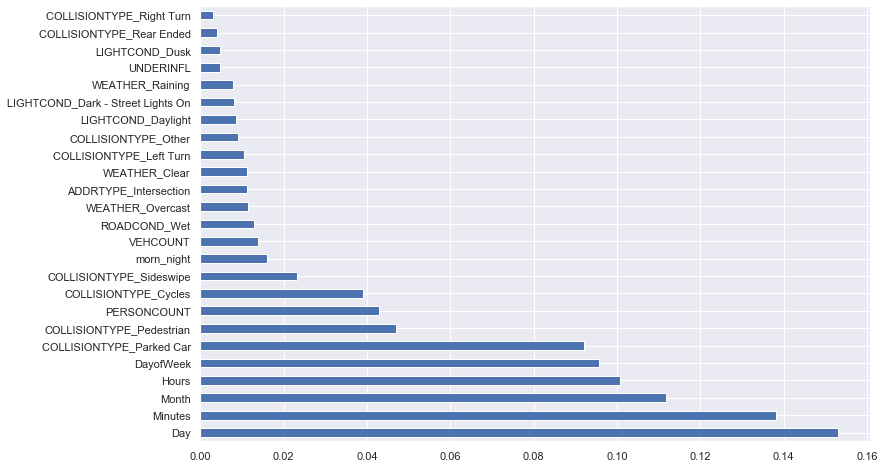

In [28]:
from sklearn import tree
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

print(selection.feature_importances_)

#plot graph of feature importances for better visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [20]:
##Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8) 

In [22]:
### Random Forest

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


from sklearn.metrics import plot_confusion_matrix


[[22082  2873]
 [ 6666  4393]]
0.7351307824734825
              precision    recall  f1-score   support

           0       0.77      0.88      0.82     24955
           1       0.60      0.40      0.48     11059

    accuracy                           0.74     36014
   macro avg       0.69      0.64      0.65     36014
weighted avg       0.72      0.74      0.72     36014



Confusion matrix, without normalization
[[22082  2873]
 [ 6666  4393]]
Normalized confusion matrix
[[0.88487277 0.11512723]
 [0.60276698 0.39723302]]


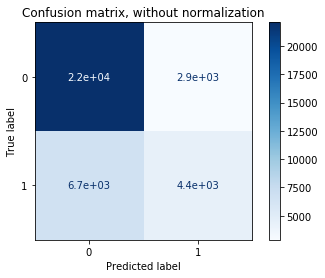

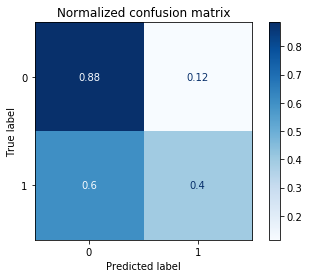

In [23]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


In [24]:
## Logistic Regression

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter= 1000)
logisticRegr.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = logisticRegr.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))



[[23792  1163]
 [ 7798  3261]]
0.7511800966290887
              precision    recall  f1-score   support

           0       0.75      0.95      0.84     24955
           1       0.74      0.29      0.42     11059

    accuracy                           0.75     36014
   macro avg       0.75      0.62      0.63     36014
weighted avg       0.75      0.75      0.71     36014



In [25]:
#Import svm model
from sklearn import svm
clf = svm.SVC() # Linear Kernel
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[24693   262]
 [ 8991  2068]]
0.7430721386127617
              precision    recall  f1-score   support

           0       0.73      0.99      0.84     24955
           1       0.89      0.19      0.31     11059

    accuracy                           0.74     36014
   macro avg       0.81      0.59      0.58     36014
weighted avg       0.78      0.74      0.68     36014



In [26]:
#k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))



[[23596  1359]
 [ 9742  1317]]
0.6917587604820348
              precision    recall  f1-score   support

           0       0.71      0.95      0.81     24955
           1       0.49      0.12      0.19     11059

    accuracy                           0.69     36014
   macro avg       0.60      0.53      0.50     36014
weighted avg       0.64      0.69      0.62     36014

